In [1]:
# Some path wizardry to make python acknowledge relative paths, just ignore this part...
import sys; sys.path.append('..')
import json
import networkx as nx
from ipywidgets import HBox, VBox
from ipysigma import Sigma
from pelote import read_graphology_json, graph_to_edges_dataframe, global_threshold_sparsification, multiscale_backbone
from pelote.projection import self_similarity_projection

In [2]:
with open('../data/polarisation.json') as f:
    graph = read_graphology_json(f)

In [3]:
Sigma(graph, node_metrics=['louvain'], node_color='louvain', node_size=graph.in_degree)

Sigma(nx.DiGraph with 420 nodes and 20,935 edges)

In [4]:
projected = self_similarity_projection(graph)

In [5]:
projected.order(), projected.size(), nx.density(projected), nx.density(graph)

(420, 86188, 0.9795204000454597, 0.11896238208887373)

In [13]:
edges_df = graph_to_edges_dataframe(projected)

<AxesSubplot:ylabel='Frequency'>

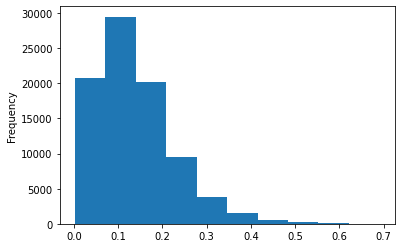

In [14]:
edges_df.weight.plot.hist()

In [15]:
edges_df.weight.min(), edges_df.weight.max()

(0.0020876826722338203, 0.690176322418136)

In [7]:
p1 = Sigma(projected, node_metrics=['louvain'], node_color='louvain', node_size=graph.degree, edge_size='weight', layout_settings={'weightedMass': True}, label_density=10)
p1

Sigma(nx.Graph with 420 nodes and 86,188 edges)

In [8]:
p2 = Sigma(global_threshold_sparsification(projected, 0.3), node_metrics=['louvain'], node_color='louvain', node_size=graph.degree, edge_size='weight')
p2

Sigma(nx.Graph with 420 nodes and 4,454 edges)

In [9]:
p3 = Sigma(multiscale_backbone(projected, 0.1), node_metrics=['louvain'], node_color='louvain', node_size=graph.degree, edge_size='weight')
p3

Sigma(nx.Graph with 420 nodes and 2,287 edges)

In [22]:
widgets = [
    Sigma(graph, node_metrics=['louvain'], node_color='louvain', node_size=graph.in_degree, sync_key='polarisation'),
    Sigma(graph, node_color='wheel_category', node_size=graph.in_degree, sync_key='polarisation'),
    Sigma(graph, node_color=p1.node_metrics['louvain']['result'], node_size=graph.in_degree, sync_key='polarisation')
]
HBox(widgets)